# Concreto Armado I - Roteiro Para as Provas P1 e P2

Passo a passo para dimensionamento de armadura longitudinal para flexão pura e simples.


Aluno: Noé de Lima Bezerra

<noe_lima@id.uff.br>

In [1]:
#import numpy as np
import sympy as sp
#import pandas as pd
#import matplotlib.pyplot as plt
from IPython.display import display, Math, Image, IFrame
#from sympy.abc import x, y, z
sp.init_printing(use_latex='mathjax',latex_mode='equation*')

Definições de unidades

In [2]:
kN,m = sp.symbols("kN,m")
Pa = (kN/m**2)/1000
mm = m/1000
cm = m/100
MPa = 1000000*Pa

# Etapa 1: Calcular as cargas sobre a Viga

### Calcular o comprimento efetivo do vão ($l_{ef}$)

\begin{equation*}
    l_{ef} = l_{0} + \min{\left\{\begin{matrix}\frac{\text{Pilar}}{2}\\0,3\times h_{viga}\end{matrix}\right.} + \min{\left\{\begin{matrix}\frac{\text{Pilar}}{2}\\0,3\times h_{viga}\end{matrix}\right.}
\end{equation*}

Onde,

* $l_{ef} = $ Comprimento Efetivo do Vão;

* $l_{0} = $ Comprimento do Vão fora das colunas

## Calcular a mesa ($b_{f}$)


\begin{equation*}
    b_{1} = \min{\left\{\begin{matrix}\frac{\text{Comprimento da Lage}}{2}\\0,1\times a\end{matrix}\right.}
\end{equation*}

Onde,

\begin{equation*}
    a = \left\{\begin{matrix}
        1,00\times l_{ef} & ; & \text{viga biapoiada} \\
        0,75\times l_{ef} & ; & \text{momento em uma extremidade} \\
        0,60\times l_{ef} & ; & \text{viga biengastada} \\
        2,00\times l_{ef} & ; & \text{viga em balanco}
    \end{matrix}\right.
\end{equation*}

E,

\begin{equation*}
    b_{f} = b_{1} + b_{w}
\end{equation*}

Obs.: A mesa deve ser calculada sempre que a lage for engastada na viga.

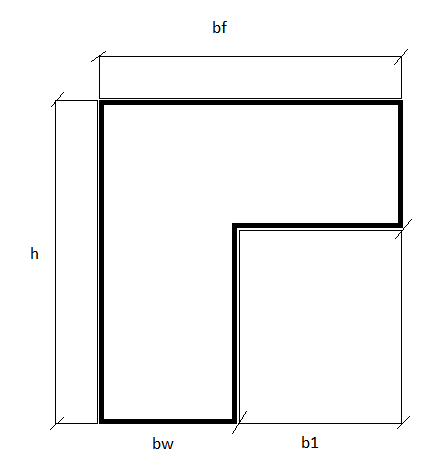

In [3]:
Image('Figuras/secao.png')

## Cálculo da carga sobre a viga

### Peso próprio da viga

\begin{equation*}
    q_{proprio} = b_{w}\times h_{viga}\times \gamma_{concreto}
\end{equation*}

Onde,

* $\gamma_{concreto} = 25~kN/m^{3}$;

* Não contar a mesa.

### Alvenaria

\begin{equation*}
    q_{alvenaria} = \left(\frac{\text{espessura} \times \text{altura} \times l_{0}}{l_{ef}}\right)\gamma_{alvenaria}
\end{equation*}

Onde,

* $\gamma_{alvenaria} = 16~kN/m^{3}$.

### Lage

\begin{equation*}
    R_{lage} = \frac{S\left(p\right)}{l_{ef}}
\end{equation*}

Onde,

* $S\left(p\right) = \gamma_{lage} + \text{revestimento} + q$;

* $\gamma_{lage} = 25~kN/m^{3}$;

* Verificar a área da lage atuante na viga.

Para o cálculo das reações de apoio das lajes maciças retangulares com carga uniforme, podem ser
feitas as seguintes aproximações (item 14.7.6.1 da NBR 6118:2014):

a) as reações em cada apoio são as correspondentes às cargas atuantes nos triângulos ou trapézios
determinados através das charneiras plásticas correspondentes à análise efetivada com
os critérios de 14.7.4, sendo que essas reações podem ser, de maneira aproximada, consideradas
uniformemente distribuídas sobre os elementos estruturais que lhes servem de apoio;

b) quando a análise plástica não for efetuada, as charneiras podem ser aproximadas por retas inclinadas, a partir dos vértices, com os seguintes ângulos:

— 45° entre dois apoios do mesmo tipo;

— 60° a partir do apoio considerado engastado, se o outro for considerado simplesmente apoiado;

— 90° a partir do apoio, quando a borda vizinha for livre.

### Cargas Acidentais

As cargas acientais devem ser calculadas utilizando os fatores $\gamma$ das tabelas ao final, de acordo com as descrições.

<b><i><FONT size=+2 color=red>*** FORNECER DETALHES! ***</FONT></i></b>

## Carga total na viga

\begin{equation*}
    Q = \sum{\left\{\begin{matrix}
        q_{proprio} \\
        q_{alvenaria} \\
        R_{lage} \\
        \text{Cargas Acidentais}
    \end{matrix}\right.}
\end{equation*}

# Etapa 2: Traçar o diagrama de momento fletor

Resolver o sistema estrutural, que pode conter estrutura hiperestática, traçar o diagrama de esforço cortante, e o diagrama de momento fletor. A partir do diagrama de momento fletor, obter o momento de serviço máximo e mínimo, para, através do momento máximo, definir a armadura longitudinal inferior, e do momento mínimo, a superior.

No formulário de consultas, está apresentada a tabela para auxiliar na solução de sistemas hiperestáticos utilizando o método das forças.

## Calcular Momento Fletor máximo

\begin{equation*}
    M_{d} = 1,4\times M
\end{equation*}

Onde,

* $M_{d} = $ Momento de Projeto (<i>Design</i>);

* $M = $ Momento de Serviço, obtido a partir do diagrama de momento fletor.

In [4]:
M, M_d = sp.symbols("M,M_d")
eq_Md = sp.Eq(M_d, 1.4*M)
display(eq_Md)
display(eq_Md.subs(M,19.732*(4.264**2)*kN*m/8))

M_d = 1.4⋅M

M_d = 62.7832144576⋅kN⋅m

# Etapa 3: Dimensionar a armadura inferior

## Calcular a Área de Aço ($A_{s}$)

\begin{equation*}
    C_{d} = T_{d}
\end{equation*}

\begin{equation*}
    \therefore
\end{equation*}

\begin{equation}\label{eq:001}
    0,85\times f_{cd}\times 0,8x\times b_{w,f} = f_{yd}\times A_{s}
\end{equation}

Onde,

* $f_{cd} = \frac{f_{ck}}{1,4}$ Resistência de projeto do concreto, que é a resistência característica do concreto à compressão sobre um fator de segurança de $1,4$;

* $f_{yd} = \frac{f_{yk}}{1,15}$ Resistência de projeto do aço, que é a resistência característica do aço à tração sobre um fator de segurança de $1,15$;

* $x = $ Altura calculada da linha neutra do momento fletor;

* $b_{w,f} = \left\{\begin{matrix}
    b_{w} & ; & \text{sem mesa colaborante};\\
    b_{f} & ; & \text{com mesa colaborante}.
\end{matrix}\right.$

A partir do lado esquerdo da equação acima, resolver:

\begin{equation}\label{eq:002}
    M_{d} = C_{d}\left(d - 0,4x\right)
\end{equation}

Onde,

* $d = $ altura da viga menos o recobrimento, que no método simplificado é $0,9\times h_{viga}$;

* Resolver a Equação (\ref{eq:002}), do segundo grau, para encontrar $x$ (utilizando algoritmo do formulário);

* Obtendo $x$, calcular $A_{s}$ através da Equação (\ref{eq:001}).

In [5]:
f_ck,b_w,f_yk,A_s,d,x = sp.symbols("f_ck,b_w,f_yk,A_s,d,x")
C_d = 0.85*(f_ck/1.4)*0.8*x*b_w
T_d = (f_yk/1.15)*A_s
eq_CdTd = sp.Eq(C_d,T_d)
eq_X = sp.Eq(M_d, C_d*(d-0.4*x))
display(eq_CdTd)
display(eq_X)

0.485714285714286⋅b_w⋅f_ck⋅x = 0.869565217391304⋅Aₛ⋅f_yk

M_d = 0.485714285714286⋅b_w⋅f_ck⋅x⋅(d - 0.4⋅x)

### Solução Rápida Substituindo os Valores

O par de valores entre colchetes é a solução para $x$. Deve-se selecionar a solução adequada substituindo o índice entre colchetes na equação de $A$ por 0 ou 1, conforme solução adequada.

O último resultado é a área de aço $A_{s}$ convertida para $mm^{2}$.

In [6]:
eqX_num = eq_X.subs(f_ck,25*MPa).subs(b_w,70*cm).subs(d,54*cm).subs(M_d,136.6*kN*m)
display(eqX_num)
X = sp.solve(eqX_num,x)
display(X)
A = sp.solve(eq_CdTd.subs(f_ck,25*MPa).subs(b_w,70*cm).subs(d,54*cm).subs(M_d,136.6*kN*m).subs(f_yk,500*MPa).subs(x,sp.solve(eqX_num,x)[0]),A_s)
display(A[0]*(10**6)/m**2)

                         ⎛27⋅m        ⎞
             8500.0⋅kN⋅x⋅⎜──── - 0.4⋅x⎟
                         ⎝ 50         ⎠
136.6⋅kN⋅m = ──────────────────────────
                         m             

[0.0304470313374046⋅m, 1.3195529686626⋅m]

595.239462646260

## Dimensionamento das barras para a área calculada

A partir do valor calculado de $A_{s}$, encontrar a bitola e a quantidade adequadas conforme tabela a seguir, refazendo os cálculos da etapa anterior para encontrar o novo valor de $x$ para o $A_{s}$ atualizado.

#### Image('Figuras/area.jpeg')

## Detalhamento da Armadura

ESCREVER

## Recálculo de $x$ e $A_{s}$ Após o Dimensionamento

A partir do detalhamento, utilizar o valor calculado de $d^{real}$ para recalcular $x$ e $A_{s}$, da mesma forma que foi calculado anteriormente.

In [7]:
eqX_num = eq_X.subs(f_ck,25*MPa).subs(b_w,70*cm).subs(d,65.7*cm).subs(M_d,136.6*kN*m)
display(eqX_num)
X = sp.solve(eqX_num,x)
display(X)
A = sp.solve(eq_CdTd.subs(f_ck,25*MPa).subs(b_w,70*cm).subs(d,65.7*cm).subs(M_d,136.6*kN*m).subs(f_yk,500*MPa).subs(x,sp.solve(eqX_num,x)[0]),A_s)
display(A[0]*(10**6)/m**2)

             8500.0⋅kN⋅x⋅(0.657⋅m - 0.4⋅x)
136.6⋅kN⋅m = ─────────────────────────────
                           m              

[0.0248361051489843⋅m, 1.61766389485102⋅m]

485.545855662642

## Verificação do Domínio

\begin{equation*}
    \frac{\epsilon_{cu}}{x} = \frac{\epsilon_{sw}}{d-x}
\end{equation*}

\begin{equation*}
    \therefore
\end{equation*}

\begin{equation*}
    \beta_{x} = \frac{x}{d} = \frac{\epsilon_{cu}}{\epsilon_{cu} + \epsilon_{sw}}
\end{equation*}

In [8]:
epsilon_cu,epsilon_sw = sp.symbols("epsilon_cu,epsilon_sw")
eq_dom = sp.Eq(epsilon_cu/x, epsilon_sw/(d-x))
display(eq_dom)

ε_cu    ε_sw
──── = ─────
 x     d - x

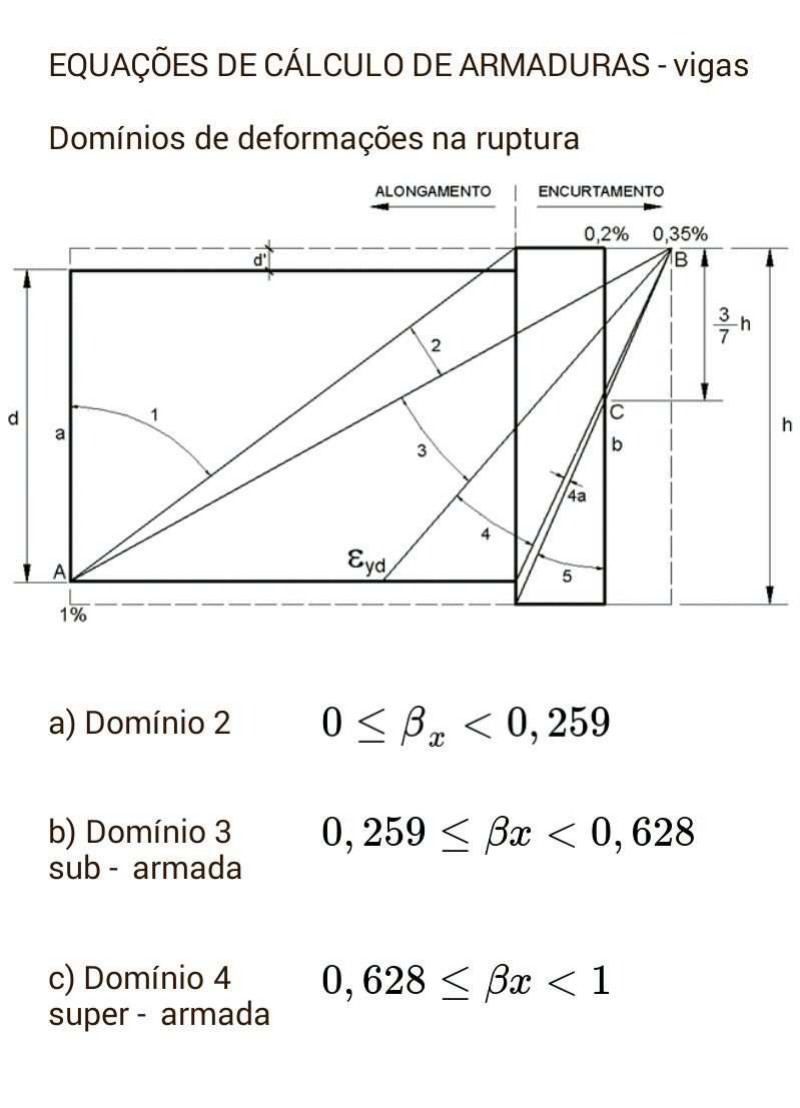

In [9]:
Image('Figuras/dominios.png')

Deve-se trabalhar sempre nos domínios 2 ou 3, onde o aço escoa antes do esmagamento do concreto, sendo esta ruptura frágil. Desta forma, não há falha dúctil onde o concreto falha sem prévio aviso. O escoamento do aço expõe as fissuras do concreto na parte inferior da viga, permitindo providências sem danos repentinos. Se a viga estiver super-armada, ou a viga trabalhando sob compressão pura, o concreto pode falhar por esmagamento antes do aço, de forma que não há forma de prever a falha quando esta for iminente.

## Verificação do $A_{s_{min}}$; $M_{d_{min}}$

\begin{equation*}
    A_{s_{min}} = 0,15\%\times A_{c}
\end{equation*}

Onde,

* $A_{s_{min}} = $ Área de Aço mínima;

* $A_{c}$ = Área de Concreto comprimida.

\begin{equation*}
    M_{d_{min}} = 0,8w_{0}\times f_{ck}
\end{equation*}

Onde,

* $M_{d_{min}} = $ Momento Mínimo de projeto;

* $w_{0} = \frac{I}{y_{t}}$;

* $f_{ck} = 1,3\times f_{ctm}$.

# Etapa 4: Dimensionar a armadura superior

A armadura superior deve ser utilizada para o caso de cair no Domínio 4, viga superarmada. Neste caso, deve-se utilizar armadura de compressão para evitar ruptura frágil no ELU - Estado Limite Último.

Obs.: no caso da armadura superior, não há mesa colaborante.

Obs.2: Caso a lage seja engastada na parte inferior da viga, a mesa colaborante é na parte inferior.

DETALHAR

# Etapa 5: Detalhar o perfil

Após obter as armaduras superior e inferior correspondentes, deve-se distribuí-las no perfil, respeitando-se as distâncias mínimas entre as barras, conforme observação abaixo. Em seguida, calcular o centro de massa correspondente das armaduras inferior e superior, bem como da área comprimida de concreto, de forma a saber o valor real de $d$, e o braço de alavanca $z$. Esse valor corrigido de $d$ permitirá saber o domínio real da estrutura, conforme cálculo e tabela de domínios já apresentados.

Obs.:

* $a_{h} = \max\left\{\begin{matrix}
    20~mm \\
    \phi \\
    1,2\times\phi_{agregado}
\end{matrix}\right.$

* $a_{y} = \max\left\{\begin{matrix}
    20~mm \\
    \phi \\
    0,5\times\phi_{agregado}
\end{matrix}\right.$

Fazer um diagrama do perfil determinado com a seção transversal, as barras, e as distâncias calculadas, conforme exemplo abaixo.

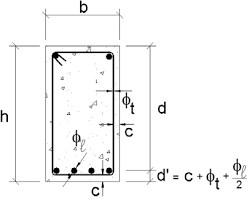

In [10]:
Image('Figuras/detalhe.png')

# Determinação da Flecha

## $I$ da peça

\begin{equation*}
    E_{cs} = \left(0,8+0,2\frac{f_{ck}}{80}\right)\left(5600\sqrt{f_{ck}}\right)
\end{equation*}

Onde,

* $E_{cs} = $ Módulo de Elasticidade Secante do concreto.

Utilizamos a equação abaixo que iguala os momentos estáticos de compressão e tração ($M_{comp}=M_{trac}$) para encontrar o valor de $x_{II}$.

\begin{equation*}
    \frac{b_{f}x_{II}^{2}}{2} = \alpha_{e}A_{s}\left(d-x_{II}\right)
\end{equation*}

Onde,

* $\alpha_{e} = \frac{E_{s}}{E_{cs}}$

* $x_{II}$ é a distância da linha neutra até o bordo mais comprimido no Estádio 2.

Finalmente, calculamos as Inércias.

\begin{equation*}
    I_{c} = \frac{b_{w}\times h^{3}}{12}
\end{equation*}

\begin{equation*}
    I_{II} = \frac{b_{f}x_{II}^{3}}{3} + \alpha_{e}A_{s}\left(d-x_{II}\right)^{2}
\end{equation*}

Os valores de $M_{a}$ e $M_{r}$, dados abaixo, serão utilizados para o cálculo do $EI_{eq}$.

\begin{equation*}
    M_{a} = M_{g} + \Psi_{2}M_{q} = \frac{gl_{ef}^{2}}{8} + \Psi_{2}\frac{ql_{ef}^{2}}{8}
\end{equation*}

\begin{equation*}
    M_{r} = \frac{\alpha f_{ct}I_{c}}{y_{t}}
\end{equation*}

Onde,

* $\alpha = \left\{\begin{matrix}
    1,2 & ; & \text{viga T e L} \\
    1,3 & , & \text{viga I ou T invertido} \\
    1,5 & ; & \text{viga retangular}
\end{matrix}\right.$

* $f_{ct} = 0,3\times\sqrt[3]{f_{ck}^{2}}$, para deformação, ou $f_{ct} = 0,21\times\sqrt[3]{f_{ck}^{2}}$, para fissura;

* O valor de $\Psi_{2}$ é dado de tabela fornecida (na dúvida, utilizar $\Psi_{2}=0,3$: valor para edifícios residenciais, ou $\Psi_{2}=0,4$: valor para edifícios comerciais, ou ainda, $\Psi_{2}=0,6$: valor para bibliotecas; consultar tabela 11.2 para outras edificações);

* Os valores de $M_{g}$ e $M_{q}$ são os momentos da viga sob carregamento permanente e acidentais, respectivamente.

## Calcular $EI_{eq}$


\begin{equation*}
    EI_{eq} = E_{cs}\left\{\left(\frac{M_{r}}{M_{a}}\right)^{3}I_{c} + \left[1-\left(\frac{M_{r}}{M_{a}}\right)^{3}\right]I_{II}\right\} \leq E_{cs}I_{c}
\end{equation*}

## Flecha Imediata

### Viga Biapoiada

\begin{equation*}
    \delta_{imed} = \frac{5pl_{ef}^{4}}{384EI_{eq}}
\end{equation*}

### Viga Biengastada

\begin{equation*}
    \delta_{imed} = \frac{pl_{ef}^{4}}{384EI_{eq}}
\end{equation*}

Onde,

* $p = g + \Psi_{2}q$

* O valor de $\Psi_{2}$ é dado de tabela fornecida (na dúvida, utilizar $\Psi_{2}=0,3$: valor para edifícios residenciais, ou $\Psi_{2}=0,4$: valor para edifícios comerciais, ou ainda, $\Psi_{2}=0,6$: valor para bibliotecas; consultar tabela 11.2 para outras edificações);

## Flecha Diferida

A flecha adicional diferida, decorrente das cargas de longa duração em função da fluência, pode
ser calculada de maneira aproximada pela multiplicação da flecha imediata pelo fator $\alpha_{f}$:

\begin{equation*}
    \delta_{dif} = \alpha_{f}\delta_{imed}
\end{equation*}

Onde,

* $\alpha_{f}=2$, para o caso sem armadura de compressão e para $t\gt70$ meses.

## Flecha Total

A flecha total é:

\begin{equation*}
    \delta_{tot} = \delta_{imed} + \delta_{dif} = \left(1+\alpha_{f}\right)\delta_{imed} \leq \frac{l_{ef}}{250}
\end{equation*}

Se $\delta_{tot}\gt\frac{l_{ef}}{250}$ (Tabela 13.2 limite visual), deve-se fazer contra-flecha.

# Determinação de Fissura

Para determinar a fissura, deve-se efetuar os cálculos de $x_{II}$ conforme cálculo da Flecha, bem como os valores de $M=M_{a}$, $f_{ct}$ e $\alpha_{e}$.

## Determinar $\sigma_{s}$

Determinar o Módulo de Elasticidade Secante do concreto $E_{cs}$:

\begin{equation*}
    E_{cs} = \left(0,8+0,2\frac{f_{ck}}{80}\right)\left(5600\sqrt{f_{ck}}\right)
\end{equation*}

Onde,

* $E_{cs} = $ Módulo de Elasticidade Secante do concreto.

Utilizamos a equação abaixo que iguala os momentos estáticos de compressão e tração ($M_{comp}=M_{trac}$) para encontrar o valor de $x_{II}$.

\begin{equation*}
    \frac{b_{f}x_{II}^{2}}{2} = \alpha_{e}A_{s}\left(d-x_{II}\right)
\end{equation*}

Onde,

* $\alpha_{e} = \frac{E_{s}}{E_{cs}}$

* $x_{II}$ é a distância da linha neutra até o bordo mais comprimido no Estádio 2.

Calcula-se o $M_{d,ser}=M$, conforme equação abaixo:

\begin{equation*}
    M = M_{g} + \Psi_{2}M_{q} = \frac{gl_{ef}^{2}}{8} + \Psi_{2}\frac{ql_{ef}^{2}}{8}
\end{equation*}

* O valor de $\Psi_{2}$ é dado de tabela fornecida (na dúvida, utilizar $\Psi_{2}=0,3$: valor para edifícios residenciais, ou $\Psi_{2}=0,4$: valor para edifícios comerciais, ou ainda, $\Psi_{2}=0,6$: valor para bibliotecas; consultar tabela 11.2 para outras edificações);

* Os valores de $M_{g}$ e $M_{q}$ são os momentos da viga sob carregamento permanente e acidentais, respectivamente.

A partir de $M$ e $x_{II}$, encontrar $\sigma_{c}$ através da equação:

\begin{equation*}
    M = \frac{b_{w,f}x_{II}}{2}\sigma_{c}\left(d-\frac{x_{II}}{3}\right)
\end{equation*}

Finalmente, a partir de $\sigma_{c}$, encontrar $\sigma_{s}$:

\begin{equation*}
    \sigma_{s} = \alpha_{e}\frac{d-x_{II}}{x_{II}}\sigma_{c}
\end{equation*}

Como forma alternativa para o cálculo de $\sigma_{s}$, pode-se calcular $I_{II}$ da seguinte forma:

\begin{equation*}
    I_{II} = \frac{b_{f}x_{II}^{3}}{3} + \alpha_{e}A_{s}\left(d-x_{II}\right)^{2}
\end{equation*}

E, em seguida, calcular $\sigma_{s}$ utilizando:

\begin{equation*}
    \sigma_{s} = \alpha_{e}\frac{M}{I_{II}}\left(d-x_{II}\right)
\end{equation*}

## Taxa de Armadura

Taxa de armadura em relação à área da região de envolvimento $A_{cr}\left(\rho_{r}\right)$.

\begin{equation*}
    \rho_{r} = \frac{A_{s}}{A_{cr}}
\end{equation*}

Para calcular o $A_{cr}$, utilizar como referência $A_{cr} = b_{w}h$, onde $h$ é a distância entre o limite mais tracionado do concreto e $7,5\phi_{i}$ do centro da barra $i$ mais distante (em direção do lado comprimido).

## Resistência do Concreto À Tração

Calcular $f_{ctm}$:

$f_{ct,m} = 0,3\times\sqrt[3]{f_{ck}^{2}}$, para deformação, ou $f_{ctk,inf} = 0,7f_{ct,m} = 0,21\times\sqrt[3]{f_{ck}^{2}}$, para fissura;

## Coeficiente de Conformação Superficial

Para barras de aço nervuradas, utilizar o coeficiente de aderência $\eta_{1}=2,25$.

Na falta de informação sobre o módulo de elasticidade do aço, utilizar, também, $E_{s}=200~GPa$

## Fissura

A fissura será o menor valor encontrado nas equações abaixo:

\begin{equation*}
    w_{k} = \frac{\phi_{i}}{12,5\eta_{1}}\frac{\sigma_{si}}{E_{si}}\frac{3\sigma_{si}}{f_{ct,m}}
\end{equation*}

\begin{equation*}
    w_{k} = \frac{\phi_{i}}{12,5\eta_{1}}\frac{\sigma_{si}}{E_{si}}\left(\frac{4}{\rho_{ri}}+45\right)
\end{equation*}

Ou seja,

\begin{equation*}
    w_{k} = \min\left\{
        \begin{matrix}
            \frac{\phi_{i}}{12,5\eta_{1}}\frac{\sigma_{si}}{E_{si}}\frac{3\sigma_{si}}{f_{ct,m}} \\
            \frac{\phi_{i}}{12,5\eta_{1}}\frac{\sigma_{si}}{E_{si}}\left(\frac{4}{\rho_{ri}}+45\right)
        \end{matrix}
    \right.
\end{equation*}

# Armadura Transversal

Escrever

# Formulário Rápido

## Processo de Cross

Para viga contínua de dois vãos:

### Calcular $\kappa_{a}$ e $\kappa_{b}$:

\begin{equation*}
    \begin{matrix}
    \kappa_{a} = \frac{3EI}{l_{ef_{a}}} & , & \kappa_{b} = \frac{3EI}{l_{ef_{b}}} \\
    \kappa_{a} = \frac{3}{l_{ef_{a}}} & , & \kappa_{b} = \frac{3}{l_{ef_{b}}}
    \end{matrix}
\end{equation*}

### Calcular os Coeficientes de Distribuição $\mu_{a}$ e $\mu_{b}$

(observar que $\mu_{a}+\mu_{b}=1$):

\begin{equation*}
    \begin{matrix}
    \mu_{a} = \frac{\kappa_{a}}{\kappa_{a} + \kappa_{b}} & , & \mu_{b} = \frac{\kappa_{b}}{\kappa_{a} + \kappa_{b}} \\
    \end{matrix}
\end{equation*}

### Calcular os Momentos de Engastamento Perfeitos

\begin{equation*}
    \begin{matrix}
    M_{epa} = \frac{pl_{ef_{a}}^{2}}{8} & , & M_{epb} = \frac{pl_{ef_{b}}^{2}}{8}
    \end{matrix}
\end{equation*}

### Momento de Engastamento Perfeito no Apoio Intermediário

(Respeitar os sinais)

\begin{equation*}
    M_{eq} = M_{epa} - M_{epb}
\end{equation*}

### Multiplicar pelos Coeficientes de Distribuição

\begin{equation*}
    \begin{matrix}
    M_{a} = M_{epa} + \mu_{a}M_{eq} & , & M_{b} = M_{epb} + \mu_{b}M_{eq}
    \end{matrix}
\end{equation*}

### Momento Negativo Máximo

\begin{equation*}
    \begin{matrix}
    M_{max}^{-} = \left|M_{a}\right|
    \end{matrix}
\end{equation*}

Ou

\begin{equation*}
    \begin{matrix}
    M_{max}^{-} = \left|M_{b}\right|
    \end{matrix}
\end{equation*}

### Momento de Engastamento Perfeito

Utilizar:

\begin{equation*}
    M = \max
    \left\{
        \begin{matrix}
            M_{max}^{-} \\
            M_{eng}^{+} = \frac{9pl_{efa}^{2}}{128}
        \end{matrix}
    \right.
\end{equation*}



## Script Para Resolver Equação do Segundo Grau

In [11]:
a = 10
b = 7
c = -6

Delta = b**2 - 4*a*c
x = sp.Symbol('x1:3')
y = sp.symbols('y')
x1,x2 = sp.solve(sp.Eq(0.25*m*y**2, 7.14*720*(mm**2)*(0.45*m-y)),y) # É possível comentar a linha abaixo, descomentar esta e inserir a equação diretamente aqui, caso não esteja no formato ax²+bx+c=0. Escrever em função de y.
# x1,x2 = sp.solve(sp.Eq(a*y**2 + b*y + c, 0),y) 
#display(sp.Eq(sp.S('Delta'),Delta))
display(sp.Eq(sp.S('x1'),x1))
display(sp.Eq(sp.S('x2'),x2))

x₁ = -0.107024306694407⋅m

x₂ = 0.0864611066944067⋅m

## Tabela de Integração Método das Forças

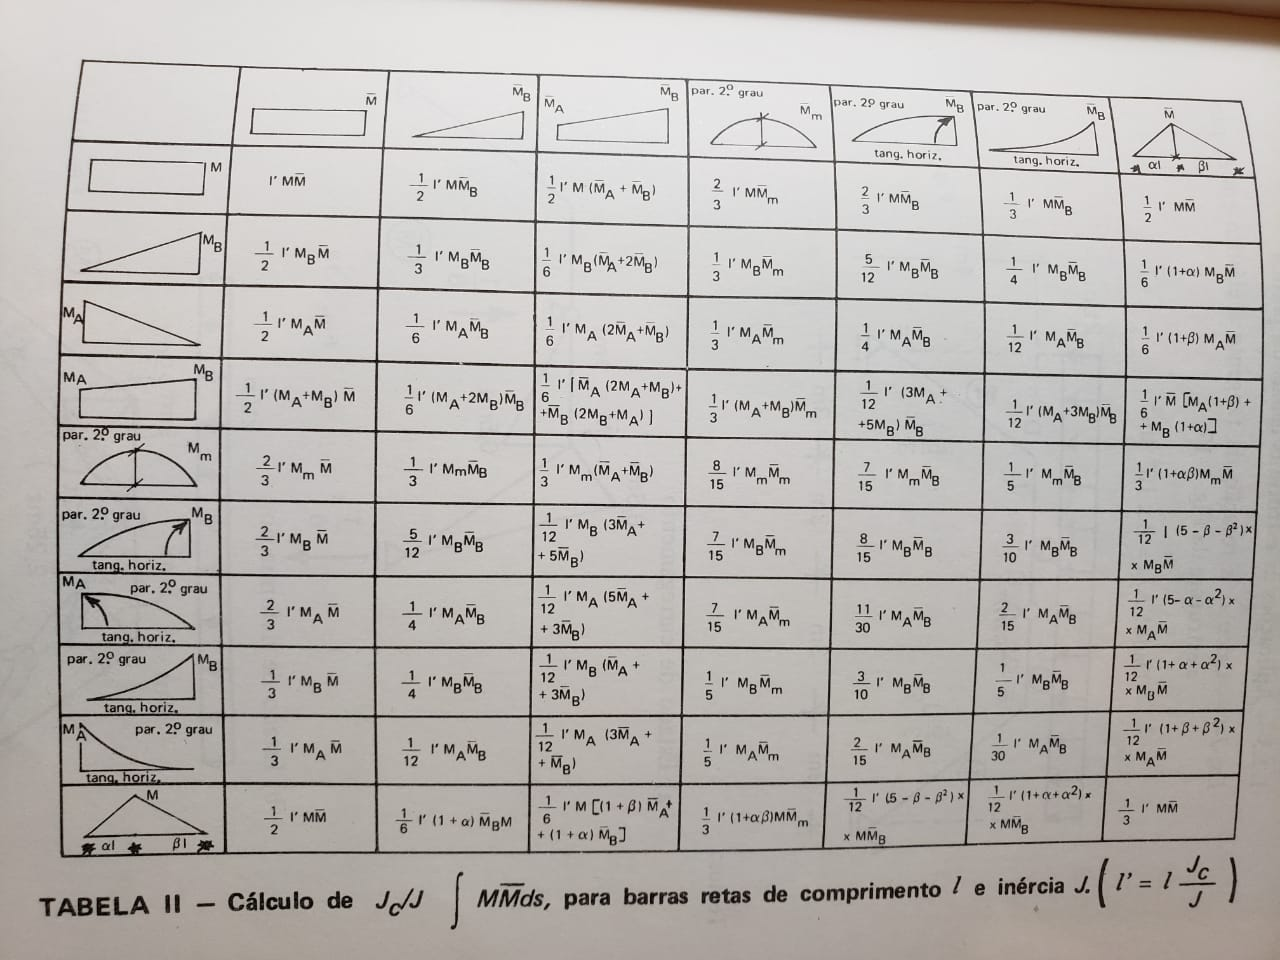

In [12]:
Image('Figuras/tabela integrais.jpg')

## Tabela de Carregamentos

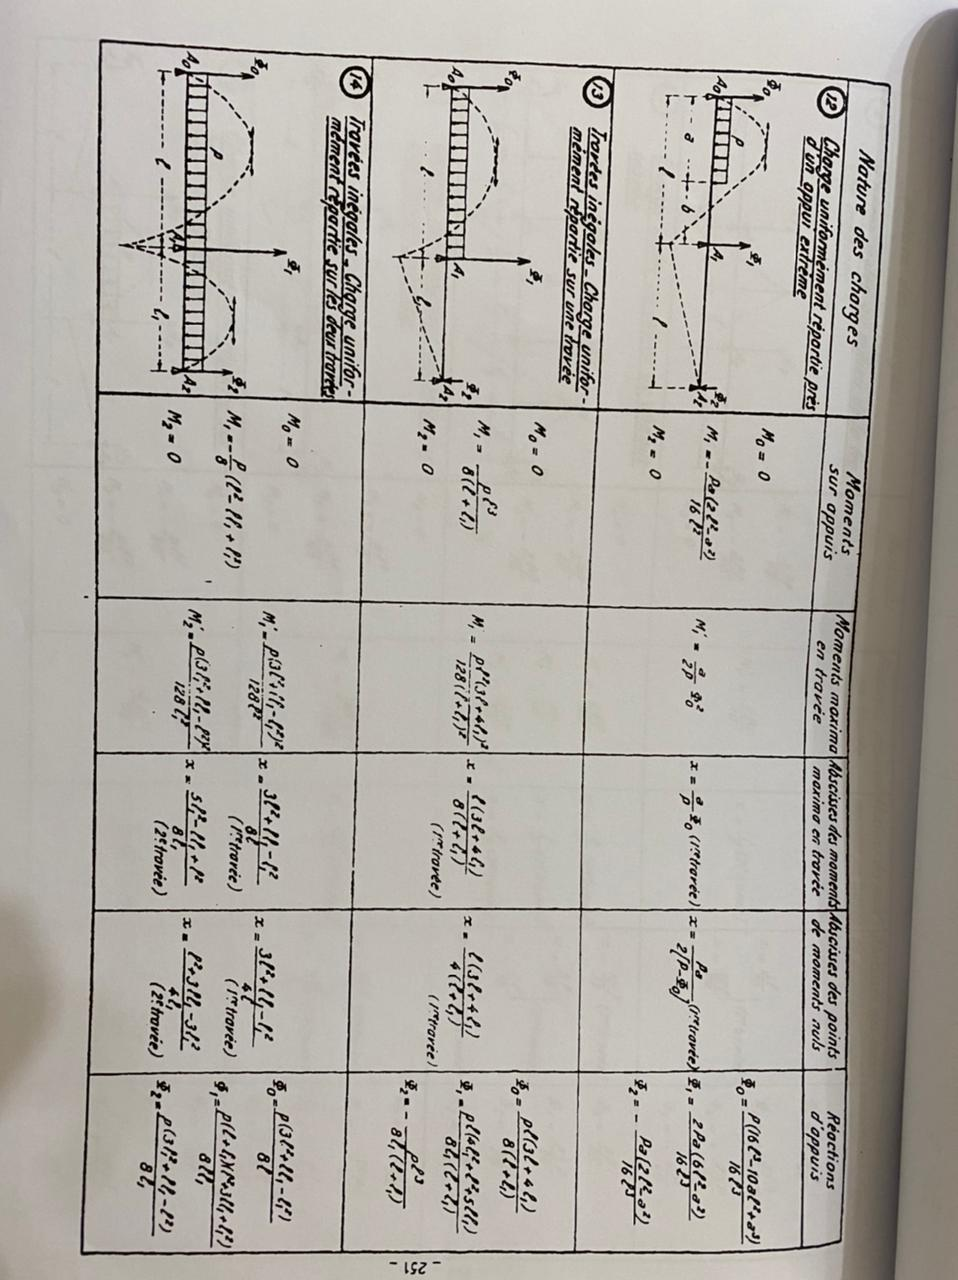

In [13]:
Image('Figuras/carregamentos.jpeg')

# Questões Teóricas

## Algumas possíveis questões teóricas

#### Para que serve a microssílica no concreto?

####	Definir resistência característica do concreto à compressão.

* O $f_{ck}$ indica qual tensão o concreto tem capacidade de resistir. Essa tensão é a resultante da divisão entre a força e a área em que ela atuará. Dessa forma, os testes de resistência no concreto possibilitam confirmar a tensão máxima a que ele resistirá antes de sofrer ruptura. Define-se a resistência característica do concreto à compressão $f_{ck}$, como aquela cuja probabilidade de ocorrência de valores inferiores seja menor que 5%.
aquela cuja probabilidade de ocorrência de valores inferiores seja menor que 5%.

####	Quais são os ensaios que fornecem a resistência do concreto à tração indireta?

####	Citar duas aplicações de cálculo para o módulo de elasticidade longitudinal do concreto.

####	O cobrimento do concreto é um tipo de proteção química em estruturas de concreto?

####	É correto afirmar que o posicionamento da armadura na peça de concreto tem influência no valor da resistência de aderência do aço ao concreto.

####	Para que serve a ancoragem das armaduras no concreto?

####	Qual a principal propriedade que assegura o trabalho conjunto entre o concreto e o aço num elemento de concreto armado?

####	Dentre os ensaios de compressão diametral de um corpo-de-prova padrão de concreto e de flexão de um corpo-de-prova prismático de concreto, qual destes conduz a um valor mais próximo da resistência característica do concreto à tração direta?

####	Pode-se relacionar a resistência característica do concreto à tração direta com a característica do concreto à compressão? Caso positivo, qual o valor desta relação, em geral, para concretos convencionais?

####	Qual o material que compõe o concreto que tem a função de aglomeração?

####	Citar dois tipos de aditivos para o concreto.

####	Quais são os ensaios que fornecem a resistência do concreto à tração indireta?

####	Citar dois tipos de módulo de elasticidade longitudinal do concreto.

####	Definir módulo de elasticidade transversal do concreto.

####	Citar duas razões básicas que tornam a escolha do concreto armado viável no emprego de uma construção.

####	Para que serve o cobrimento do concreto?

####	Citar dois parâmetros que influenciam a resistência de aderência do aço ao concreto.

####	Citar duas características do concreto que o fazem ser o material de construção mais utilizado pelo homem.

####	Qual a principal função do cimento no material concreto?

####	É correto afirmar que os cimentos do tipo Portland são especificados de acordo com sua composição química, tipo de adições e propriedades?

####	Devem os agregados ser lisos e possuir formas e dimensões tais que, com o maior consumo de cimento possível, conduzam a um concreto trabalhável no seu estado fresco?

####	Citar dois tipos de aditivos para o concreto.

####	Por ser resultante de um ensaio de relativa dificuldade, a resistência do concreto à tração direta pode ser estimada em função de quais outros ensaios de tração indireta?

####	Qual a propriedade do concreto utilizada para avaliação de deslocamentos estruturais?

####	Qual o artifício utilizado no aço para que os esforços a que esteja submetido sejam integralmente transmitidos ao concreto?

####	Para que serve a ancoragem das armaduras no concreto?

####	Citar dois tipos de ações permanentes numa estrutura de concreto armado.

####	Citar duas hipóteses básicas adotadas na teoria da flexão simples para o dimensionamento de lajes de concreto armado no estado limite último.

####	Definir altura útil de uma viga de concreto armado.

####	Definir coeficiente de Poisson.

####	Definir aderência entre o aço e o concreto.

####	No estado fresco (não endurecido), o que deve o concreto apresentar?

####	Quais são os principais componentes do cimento?

####	De um modo geral, a produção de uma estrutura de concreto envolve operações básicas. Após a dosagem, o transporte e o lançamento do concreto, quais são as duas operações seguintes?

####	Definir braço de alavanca de uma viga de concreto armado.

* É a distância entre a resultante de forças de compressão ($C_{d}$) e a resultante das forças de tração ($T_{d}$) em vigas de concreto.

####	As formas, dimensões e textura dos agregados influenciam a trabalhabilidade de um concreto no seu estado fresco?

####	Qual ensaio foi inventado por pesquisador brasileiro, cujo resultado pode-se determinar a resistência do concreto à tração indireta do concreto?

####	É correto afirmar que a resistência do concreto à compressão, as regiões de localização e conformação superficial da armadura interna num elemento estrutural de concreto armado influenciam a resistência de aderência do aço?

####	Cite três hipóteses básicas adotadas na teoria da flexão simples para o dimensionamento de vigas de concreto armado no estado limite último.

* Manutenção das seções transversais planas até a ruptura (Hipótese de Bernoulli)

* Perfeita aderência entre a armadura interna e o concreto - deformação do aço deve ser a mesma do concreto em seu entorno

* Resistência do concreto à tração $f_{ct}$ é desprezada

####	Para o dimensionamento de peças de concreto armado sujeitas à flexão no estado limite último, a norma ABNT NBR-6118/2014 preconiza que pode ser adotado um diagrama simplificado retangular de tensões de compressão no concreto com altura de 80% da altura da linha neutra para fck até $50MPa$?

####	Por recomendação de norma, quais os valores máximos para deformação do concreto e do aço a serem utilizados no dimensionamento de vigas de concreto armado sujeitas à flexão simples para o estado limite último?

####	Quais são os domínios de estado limite último em que ocorre o máximo alongamento do aço permitido por norma numa peça de concreto armado?

####	Citar dois tipos de ações acidentais numa estrutura de concreto armado.

####	Quais são as faixas de variação dos valores de deformação do concreto e do aço numa peça de concreto armado sujeita a esforços de flexão simples no domínio 3 do estado limite último? Qual destes materiais tem sua capacidade resistente esgotada neste domínio?

####	Quais as condições para ter-se uma viga com armadura longitudinal interna balanceada no estado limite último?

####	Leva-se em conta a resistência do concreto à tração no dimensionamento de uma viga de concreto armado sujeita à flexão simples para o estado limite último?

####	Duas vigas 1 e 2 são semelhantes em todos os aspectos, mas a viga 1 tem uma altura total maior que a da viga 2. Na ruptura, qual destas apresentará uma ruptura com aviso prévio?

####	É correto afirmar que o estado limite de serviço está relacionado com a durabilidade de estruturas de concreto armado?

####	É correto afirmar que o parâmetro abertura de fissuras tem relação com o estado limite de vibrações excessivas?

####	Citar duas hipóteses básicas adotadas na teoria da flexão simples para o dimensionamento de lajes de concreto armado no estado limite último.

* Manutenção da seção plana após a deformação, em faixas suficientemente estreitas;

* Representação dos elementos por seu plano médio.

#### Quais são os valores de deformação do concreto e do aço em uma viga de concreto armado no domínio 3 do estado limite último? Qual destes materiais tem sua capacidade resistente esgotada neste domínio?

#### Qual o valor da deformação de cálculo ao escoamento do aço tipo CA-60?

* O aço CA-60 por passar por um processo de encruamento a frio não possui patamar de escoamento definido. Após o trecho inicial linear do diagrama tensão x deformação, o diagrama torna-se uma curva e seu alongamento máximo é limitado ao valor de 10%o, para evitar deformações plásticas excessivas na ruptura.

#### Definir viga de concreto armado normalmente armada.

* A viga normalmente armada possui a taxa de armadura adequada com rompimento no domínio 3. A ruptura é dúctil, com aviso prévio pois ocorre a deformação excessiva da armadura e o concreto é esmagado.

#### Cite três parâmetros influentes na resistência de aderência de cálculo entre o aço e o concreto.

* Parâmetro que considera a rugosidade da barra ɳ1

* Parâmetro que considera a posição da barra na peça ɳ2

* Parâmetro que considera o diâmetro da barra ɳ3.

#### Definir armadura mínima de uma viga em concreto armado.

#### Quais são os valores de deformação do concreto e do aço em uma viga de concreto armado no domínio 4 do estado limite último? Qual destes materiais tem sua capacidade resistente esgotada neste domínio?

#### Definir altura da linha neutra de uma viga em concreto armado no estado limite último.

#### Definir altura útil de uma viga em concreto armado.

#### Cite três assuntos influentes na parcela $V_{c}$ referente ao dimensionamento ao cisalhamento de vigas. (P2)

#### Quais são os valores de deformação do concreto e do aço em uma viga de concreto armado no domínio 2 do estado limite último? Qual destes materiais tem sua capacidade resistente esgotada neste domínio?

* Neste domínio a deformação do concreto vai de 0°/oo até 3,5°/oo e a do aço é 10°/oo. O aço tem a capacidade esgotada.

#### Qual o artifício utilizado na barra de aço para que os esforços a que esteja submetida sejam integralmente transmitidos ao concreto?